In [42]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_valid_data = pd.read_csv('train_valid.csv')

In [44]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

In [45]:
def predict_knn(test_row, train_data, k=5):
    distances = []
    for i, train_row in train_data.iterrows():
        dist = euclidean_distance(test_row[:-1], train_row[:-1])  # Exclude target column
        distances.append((train_row['target'], dist))
    # Sort by distance and get the k nearest neighbors
    neighbors = [label for label, dist in sorted(distances, key=lambda x: x[1])[:k]]
    # Get the most common class label among neighbors
    return Counter(neighbors).most_common(1)[0][0]

In [46]:
val_data = pd.read_csv('train_valid.csv')
val_X = val_data.iloc[:, :-1]
val_y = val_data.iloc[:, -1]

# Assuming 'best_knn' is the fine-tuned model from the previous step
# and 'val_predictions' contains the predicted labels for validation set
# val_predictions = best_knn.predict(val_X)
val_predictions = val_data.apply(lambda row: predict_knn(row, train_data), axis=1)

# Find misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(val_y, val_predictions)) if true != pred]
misclassified_samples = val_data.iloc[misclassified_indices]
misclassified_samples['Predicted Label'] = val_predictions[misclassified_indices]

# Output the misclassified samples
print("Misclassified samples:")
print(misclassified_samples[['Predicted Label', val_y.name]])

Misclassified samples:
  Predicted Label           target
1  Iris-virginica  Iris-versicolor


C:\Users\Hemanth\AppData\Local\Temp\ipykernel_24800\4045522355.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['Predicted Label'] = val_predictions[misclassified_indices]


In [47]:
test_data['predicted'] = test_data.apply(lambda row: predict_knn(row, train_data), axis=1)
train_valid_data['predicted'] = train_valid_data.apply(lambda row: predict_knn(row, train_data), axis=1)

In [48]:
y_valid_true = train_valid_data['target']
y_valid_pred = train_valid_data['predicted']

accuracy = accuracy_score(y_valid_true, y_valid_pred)
precision = precision_score(y_valid_true, y_valid_pred, average='macro')
recall = recall_score(y_valid_true, y_valid_pred, average='macro')
conf_matrix = confusion_matrix(y_valid_true, y_valid_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation Confusion Matrix:\n{conf_matrix}")

Validation Accuracy: 0.8571428571428571
Validation Precision: 0.8888888888888888
Validation Recall: 0.8888888888888888
Validation Confusion Matrix:
[[2 0 0]
 [0 2 1]
 [0 0 2]]


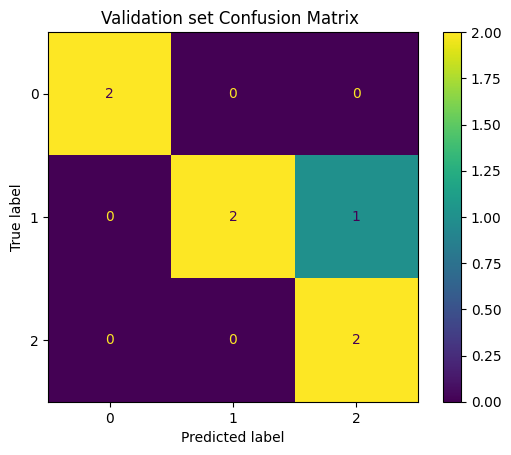

In [49]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Validation set Confusion Matrix " )
plt.show()

In [52]:
y_true = test_data['target']
y_pred = test_data['predicted']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
# print(f"Confusion Matrix:\n{conf_matrix}")

Test Accuracy: 0.9736842105263158
Test Precision: 0.9743589743589745
Test Recall: 0.9696969696969697


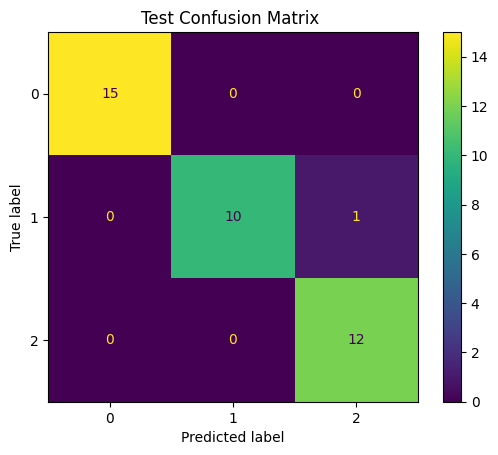

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.title("Test Confusion Matrix " )
plt.show()